In [1]:
import numpy
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import os

Using TensorFlow backend.


In [2]:
root_path = r"c:\Data\181101_Spine"

train_path = os.path.join(root_path, "train")
valid_path = os.path.join(root_path, "valid")
test_path = os.path.join(root_path, "test")

In [3]:
image_size = 64

train_batches = ImageDataGenerator(horizontal_flip=True).flow_from_directory(
    train_path, target_size=(image_size, image_size),
    color_mode='grayscale', classes=["pos", "neg"], shuffle=True, batch_size=50)
valid_batches = ImageDataGenerator(horizontal_flip=True).flow_from_directory(
    valid_path, target_size=(image_size, image_size),
    color_mode='grayscale', classes=["pos", "neg"], shuffle=True, batch_size=50)
test_batches = ImageDataGenerator(horizontal_flip=True).flow_from_directory(
    test_path, target_size=(image_size, image_size),
    color_mode='grayscale', classes=["pos", "neg"], shuffle=True, batch_size=200)

Found 2037 images belonging to 2 classes.
Found 747 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(20,6), rows=1, titles=None):
    if type(ims[0]) is numpy.ndarray:
        ims = numpy.array(ims).astype(numpy.uint8)
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis("Off")
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i][:, :, 0], cmap='gray')

In [5]:
imgs, labels = next(train_batches)

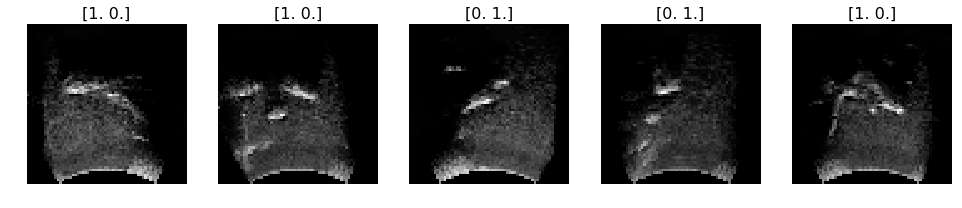

In [6]:
plots(imgs[:5], titles=labels[:5])

In [7]:

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(image_size, image_size, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
__________

In [9]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit_generator(train_batches, steps_per_epoch=20, validation_data=valid_batches, validation_steps=7, epochs=50, verbose=1)

Epoch 1/50
20/20 [==============================] - 4s 181ms/step - loss: 1.0596 - acc: 0.5180 - val_loss: 0.6835 - val_acc: 0.6057
Epoch 2/50
20/20 [==============================] - 2s 102ms/step - loss: 0.7249 - acc: 0.5424 - val_loss: 0.6896 - val_acc: 0.5743
Epoch 3/50
20/20 [==============================] - 2s 95ms/step - loss: 0.7004 - acc: 0.5800 - val_loss: 0.6851 - val_acc: 0.5706
Epoch 4/50
20/20 [==============================] - 2s 97ms/step - loss: 0.6666 - acc: 0.6080 - val_loss: 0.6631 - val_acc: 0.6943
Epoch 5/50
20/20 [==============================] - 2s 97ms/step - loss: 0.6410 - acc: 0.6321 - val_loss: 0.6444 - val_acc: 0.7579
Epoch 6/50
20/20 [==============================] - 2s 99ms/step - loss: 0.6272 - acc: 0.6620 - val_loss: 0.6396 - val_acc: 0.7171
Epoch 7/50
20/20 [==============================] - 2s 98ms/step - loss: 0.6205 - acc: 0.6618 - val_loss: 0.6144 - val_acc: 0.7147
Epoch 8/50
20/20 [==============================] - 2s 99ms/step - loss: 0.5547 -

Text(0.5,1,'Accuracy Curves')

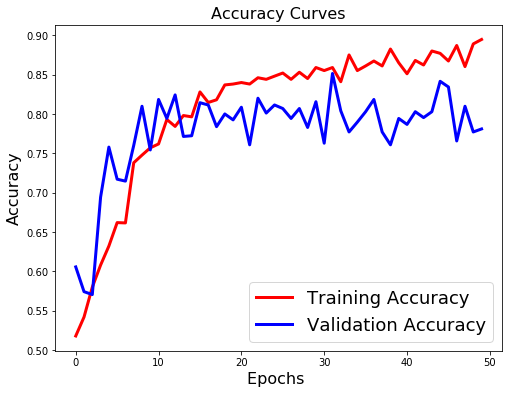

In [11]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [12]:
test_imgs, test_labels = next(test_batches)
# plots(test_imgs, titles=test_labels)

In [13]:
test_labels = test_labels[:,0]
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [14]:
for i in range(predictions.shape[0]):
    if predictions[i][0] > predictions[i][1]:
        predictions[i][0]=1
    else:
        predictions[i][0]=0

In [15]:
import pandas as pd
y_true = pd.Series(test_labels)
y_pred = pd.Series(predictions[:,0])
pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,84,34,118
1.0,67,15,82
All,151,49,200
